# Goal
The goal of collecting the Heart Attack Analysis & Prediction dataset is to determine the factors that can increase the risk of heart disease in patients. Within this dataset, there’s information on various patient attributes like age, sex, blood pressure, and fasting blood sugar. In addition, there’s a target variable that indicates the presence or absence of heart disease. 
By analyzing the relationship between the patient attributes and the target variable, we can understand the reasons behind the heart disease risk and create models to spot patients with higher risk, and here is where we benefit from Machine Learning (ML) and Artificial Intelligence (AI).

# Dataset Source
The link of the dataset: https://www.kaggle.com/datasets/pritsheta/heart-attack?resource=download

# General Dataset Information
This dataset contains 303 observations with 14 variables which include 13 patient attributes and one target variable, the types of variables in the dataset are binary, numeric, and categorical. <br> <br>
The patient attributes with binary variables:<br>
•	Sex <br>
•	exercise-induced angina <br>
•	fasting blood sugar > 120 mg/dl<br>

 The patient attributes with numeric variables:<br>
•	age<br>
•	resting blood pressure<br>
•	ST depression induced by exercise<br>
•	serum cholesterol level<br>
•	maximum heart rate achieved during exercise <br>

The patient attributes with categorical variables: <br>
•	chest pain type <br>
•	slope of the peak exercise ST segment<br>
•	number of major vessels colored by fluoroscopy<br>
•	thallium stress test result<br>
•	electrocardiographic result<br>


Our dataset contains a binary target variable indicating whether heart disease is present or absent. This variable can be termed as the class or label and offers two outcomes: label 0 for patients without heart disease and label 1 for those with it. The objective of examining this dataset is to predict a patient's heart disease status using their attributes, based on the value of the target variable.


In [72]:
# required import 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")

In [73]:
data = pd.read_csv('Heart Attack Data Set.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [74]:
#Get num of rows and columns
print("There are",data.shape[0]," Row and ",data.shape[1]," Column in the dataset")

There are 303  Row and  14  Column in the dataset


In [75]:
data.head()
#Retrieve first 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
data.tail()
#Retrieve last 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [77]:
data.dtypes
#Get data type of each column

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [78]:
data.info()
#Get the summary of data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [79]:
data.describe()
#Summary statistics of the numerical columns

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [80]:
data.describe(include='all')
# Summary statistics include categorical columns

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [81]:
print(data.var())
#Print the varience

age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64


In [82]:
data.columns
#Column names

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [83]:
data.corr()
#The correlation between the data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

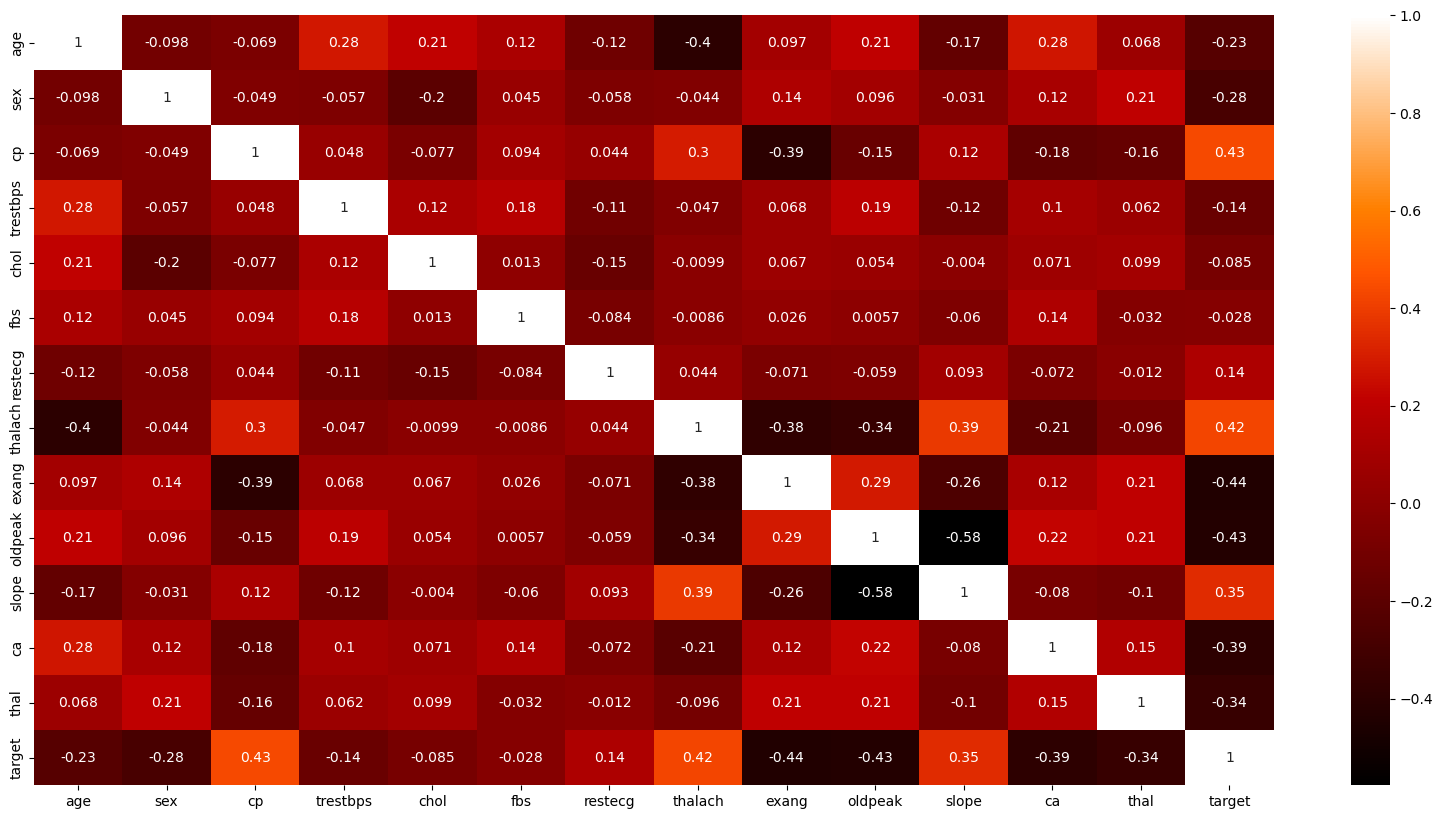

In [84]:
#heat map to show Correlation between Variables 
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr() , annot=True , cmap="gist_heat" , linecolor="black")

In [85]:
data.isnull()
#Show null values

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [86]:
data.isnull().sum()
#show total of null values in each column

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

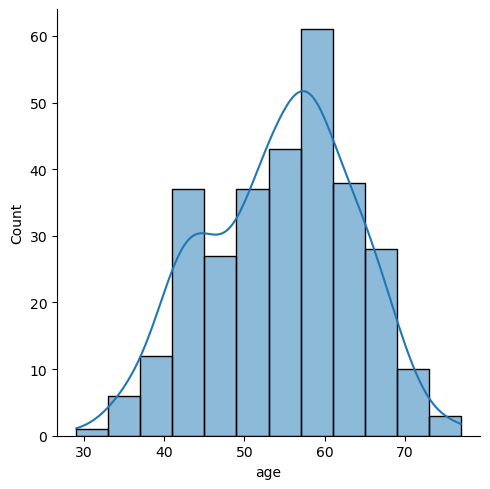

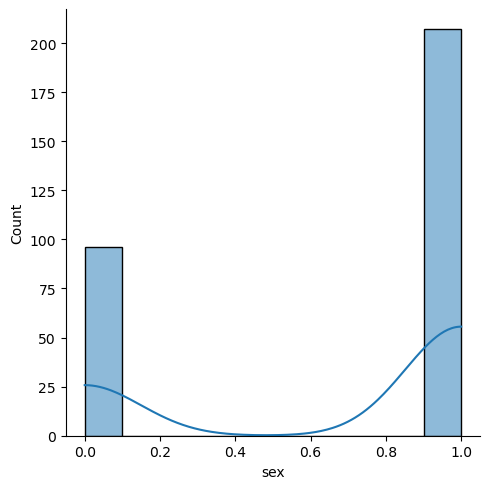

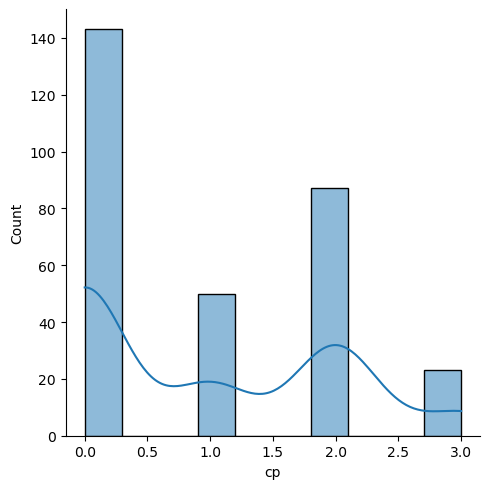

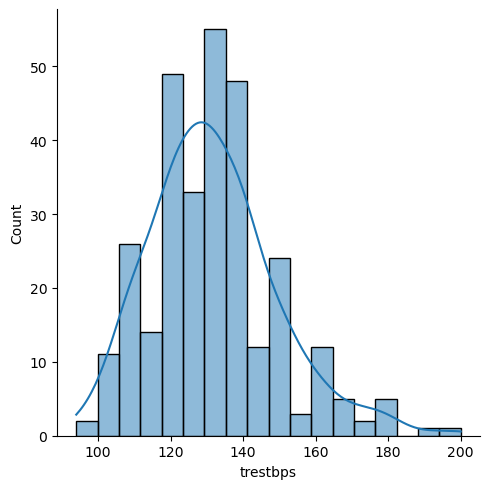

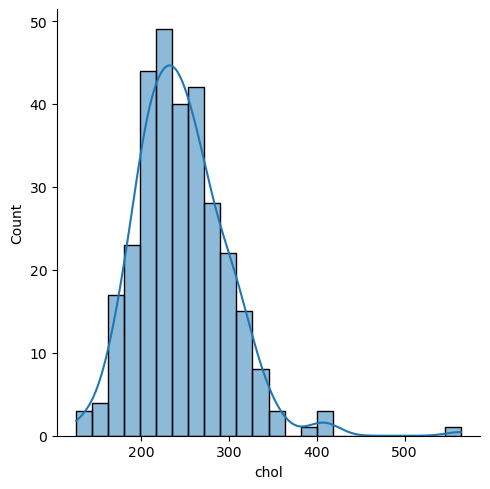

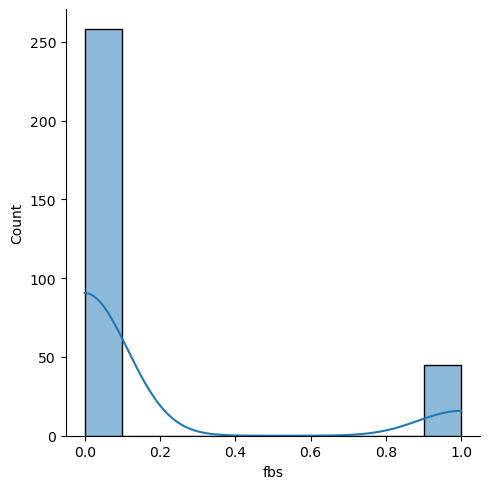

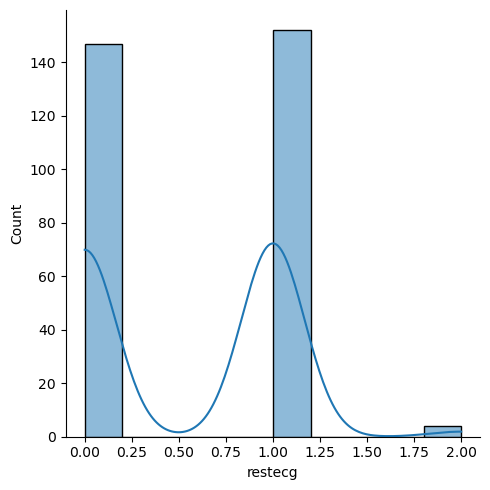

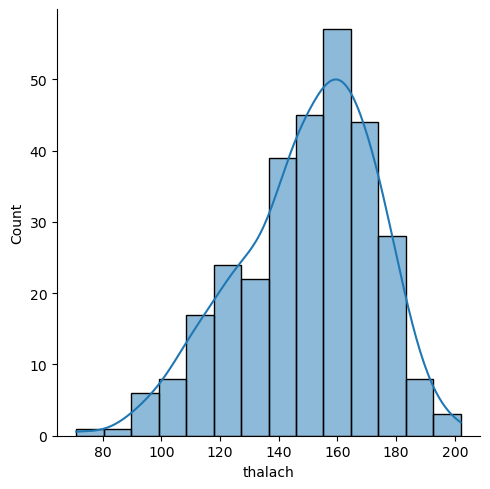

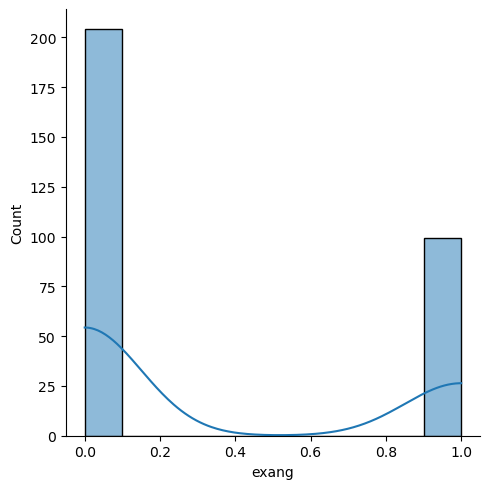

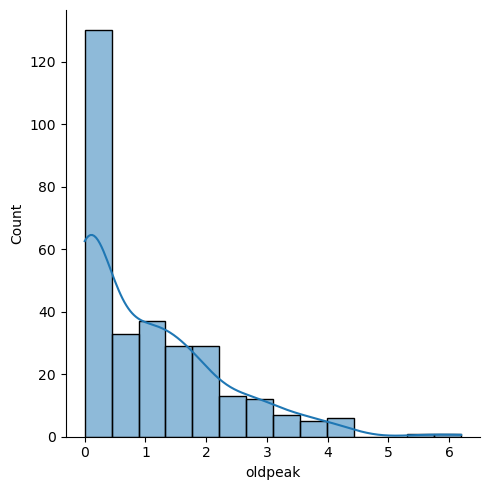

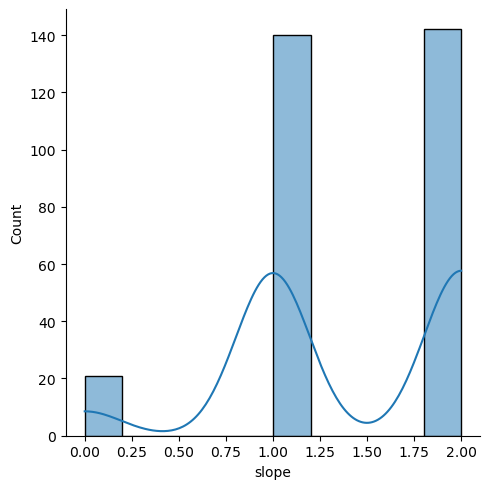

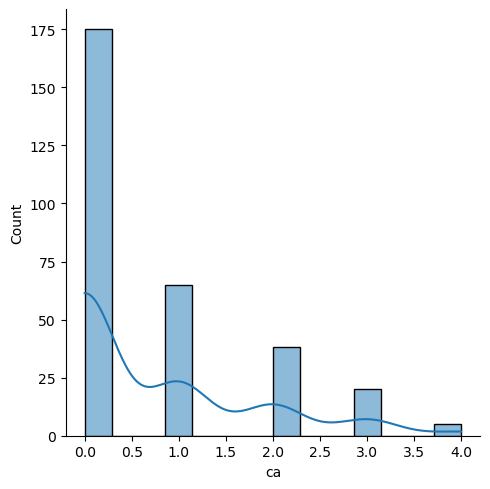

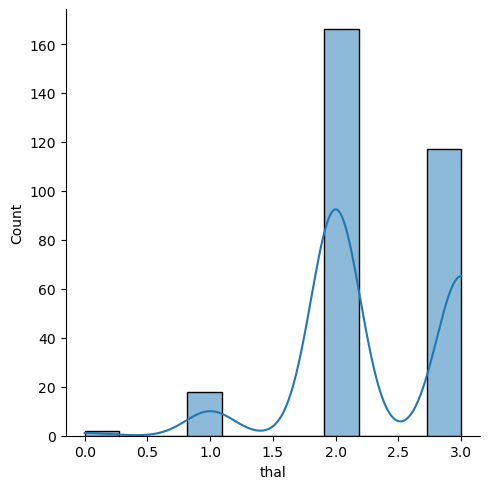

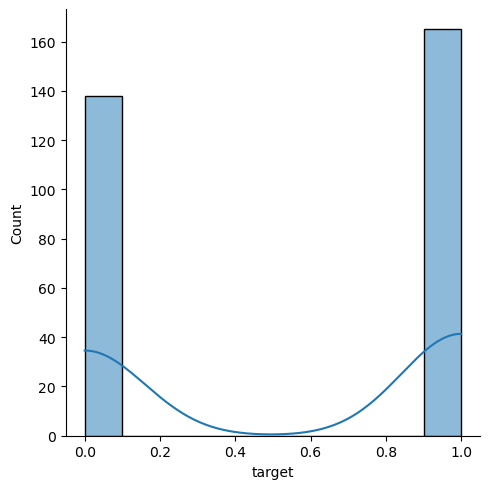

In [87]:
# Distribution plot for each variable
for column in data.columns:
    sns.displot(data[column], kde=True)

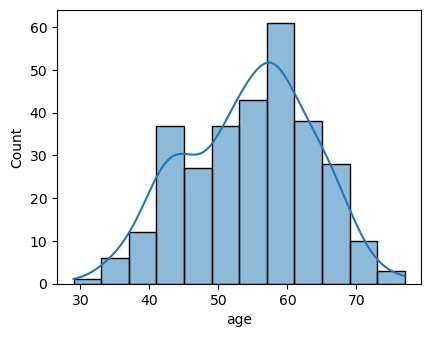

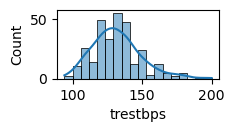

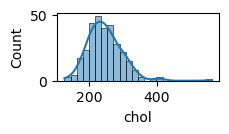

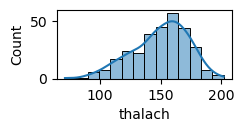

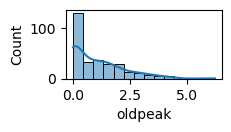

In [88]:
#tp display histogram chart for all variables

plt.figure(figsize=(12,13))
data_cat = data.drop(['sex' ,'exang','fbs','restecg', 'slope' , 'ca' , 'cp',  'target' , 'thal'] , axis=1)
for i , col  in enumerate(data_cat.columns ,1):
    plt.subplot(4,3 ,i)
    sns.histplot(data_cat[col], kde=True ) 
    plt.tight_layout()
    plt.show()

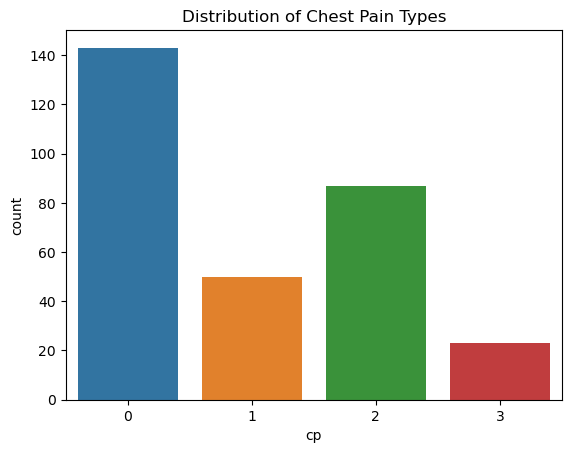

In [89]:


# Select the column to display the bar plot for
col = 'cp'

# Count the number of instances of each category in the column
counts = data[col].value_counts()

# Create a bar plot of the counts
sns.barplot(x=counts.index, y=counts)

# Add a title to the chart
plt.title('Distribution of Chest Pain Types')

# Show the chart
plt.show()

# To display bar plot chart

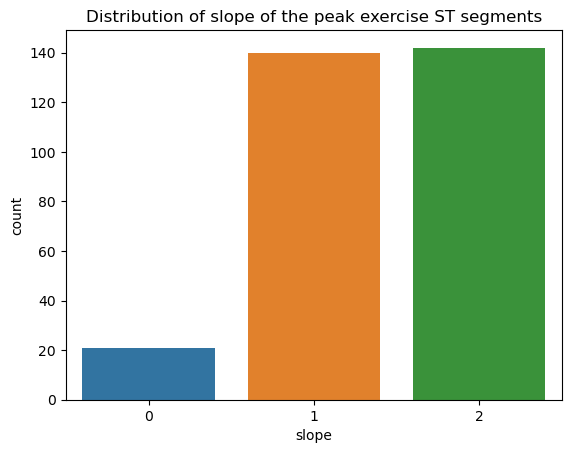

In [90]:
# Select the column to display the bar plot for
col = 'slope'

# Count the number of instances of each category in the column
counts = data[col].value_counts()

# Create a bar plot of the counts
sns.barplot(x=counts.index, y=counts)

# Add a title to the chart
plt.title('Distribution of slope of the peak exercise ST segments')

# Show the chart
plt.show()

# To display bar plot chart

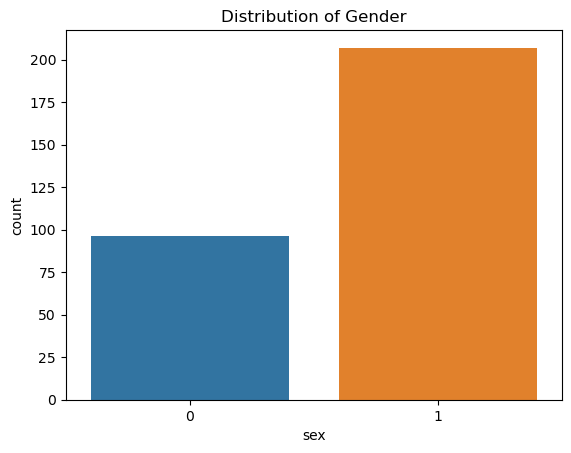

In [91]:
# Select the column to display the bar plot for
col = 'sex'

# Count the number of instances of each category in the column
counts = data[col].value_counts()

# Create a bar plot of the counts
sns.barplot(x=counts.index, y=counts)

# Add a title to the chart
plt.title('Distribution of Gender')

# Show the chart
plt.show()

# To display bar plot chart
#0 is for female
#1 is fore male

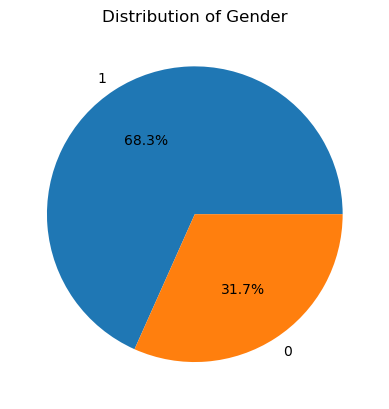

In [92]:
# display pie chart

# Select the column to display the bar pie chart for
col = 'sex'

# Count the number of instances of each category in the column
counts = data[col].value_counts()

# Create a bar pie chart of the counts
fig, ax = plt.subplots()
ax.pie(counts, labels=counts.index, autopct='%1.1f%%')
ax.set_title('Distribution of Gender')

# Show the chart
plt.show()

#0 is for female
#1 is fore male

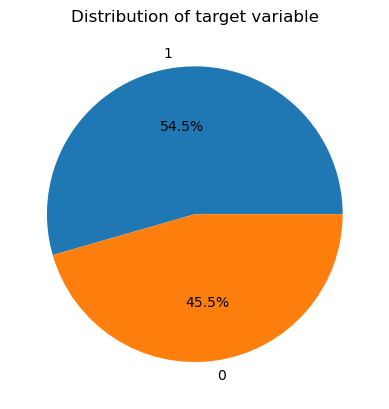

In [93]:
# display pie chart

# Select the column to display the bar pie chart for
col = 'target'

# Count the number of instances of each category in the column
counts = data[col].value_counts()

# Create a bar pie chart of the counts
fig, ax = plt.subplots()
ax.pie(counts, labels=counts.index, autopct='%1.1f%%')
ax.set_title('Distribution of target variable')

# Show the chart
plt.show()
#0: no heart disease
#1: has heart disease

In [94]:
for column in data.columns:
    print(data[column].value_counts())
    # Show the table of distribution for each variable

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64
sex
1    207
0     96
Name: count, dtype: int64
cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64
trestbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1

In [95]:
print(data.duplicated().sum())
#How many duplicated rows

1


In [96]:
duplicates = data[data.duplicated()]
print(duplicates)
#find the duplicated data

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1  


In [97]:
data=data.drop_duplicates(keep="last")
#Remove the duplicate row

In [98]:
print(data.duplicated().sum())
#How many duplicated rows

0


In [99]:
duplicates = data[data.duplicated()]
print(duplicates)
#the duplicates row after dropping

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


In [100]:
# Assuming you have a DataFrame named 'data' and the target variable is in the last column
# Extract features (Xall) and target variable (yall)
Xall = data.iloc[:, :-1]  # All columns except the last one
yall =data.target
 # The last column (target variable)

In [101]:
# Define the columns to apply the transformation to
skew_columns = ['oldpeak', 'chol']

# Apply the logarithmic transformation using .loc
data.loc[:, skew_columns] = data[skew_columns].apply(lambda x: np.log1p(x))

In [102]:
# Set the seed for reproducibility
np.random.seed(0)

# Define the test size (e.g., 20%)
test_size = 0.2

# Calculate the number of samples for the test set
num_test_samples = int(test_size * len(Xall))

# Generate random indices for the test set
test_indices = np.random.choice(len(Xall), num_test_samples, replace=False)

# Create training and testing sets
X = Xall.drop(index=test_indices)
y = yall.drop(index=test_indices)
Xt = Xall.iloc[test_indices]
yt = yall.iloc[test_indices]

# Print the shapes of the sets
print("X_train shape: ", X.shape)
print("X_test shape: ", Xt.shape)
print()
print("Y_train shape: ", y.shape)
print("Y_test shape: ", yt.shape)

X_train shape:  (242, 13)
X_test shape:  (60, 13)

Y_train shape:  (242,)
Y_test shape:  (60,)


In [103]:
# Standardization (z-score scaling)
mean = X.mean()
std = X.std()
x_train_scaled = (X - mean) / std
x_test_scaled = (Xt - mean) / std

# Min-Max Scaling
min_value = X.min()
max_value = X.max()
x_train_scaled_minmax = (X - min_value) / (max_value - min_value)
x_test_scaled_minmax = (Xt - min_value) / (max_value - min_value)

# Create DataFrames with scaled values
X_scaled = pd.DataFrame(x_train_scaled, columns=X.columns)
Xt_scaled = pd.DataFrame(x_test_scaled, columns=Xt.columns)
X_scaled_minmax = pd.DataFrame(x_train_scaled_minmax, columns=X.columns)
Xt_scaled_minmax = pd.DataFrame(x_test_scaled_minmax, columns=Xt.columns)

# Print the first few rows of the scaled DataFrames
print("Standardized Scaled Data:")
print(X_scaled.head())
print("\nMin-Max Scaled Data:")
print(X_scaled_minmax.head())

Standardized Scaled Data:
        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.908322  0.707832  1.943979  0.774803 -0.274820  2.387169 -0.961363   
1 -2.019527  0.707832  0.989734 -0.095681  0.047475 -0.417175  0.914846   
2 -1.569089 -1.406926  0.035488 -0.095681 -0.824617 -0.417175 -0.961363   
3  0.120055  0.707832  0.035488 -0.676005 -0.217945 -0.417175  0.914846   
4  0.232664 -1.406926 -0.918757 -0.676005  2.019161 -0.417175  0.914846   

    thalach     exang   oldpeak     slope        ca      thal  
0  0.006073 -0.701275  1.036746 -2.270064 -0.703838 -2.065148  
1  1.605448 -0.701275  2.041991 -2.270064 -0.703838 -0.458184  
2  0.957053 -0.701275  0.282812  0.961439 -0.703838 -0.458184  
3  1.216411 -0.701275 -0.219811  0.961439 -0.703838 -0.458184  
4  0.568016  1.420082 -0.387352  0.961439 -0.703838 -0.458184  

Min-Max Scaled Data:
        age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.708333  1.0  1.000000  0.520408

In [104]:
# Variable transformation: Apply a logarithmic transformation to 'fbs' variable
data.loc[:, 'fbs'] = data['fbs'].apply(lambda x: np.log(x))
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,5.455321,0.0,0,150,0,1.193922,0,0,1,1
1,37,1,2,130,5.525453,-inf,1,187,0,1.504077,0,0,2,1
2,41,0,1,130,5.323010,-inf,0,172,0,0.875469,2,0,2,1
3,56,1,1,120,5.468060,-inf,1,178,0,0.587787,2,0,2,1
4,57,0,0,120,5.872118,-inf,1,163,1,0.470004,2,0,2,1


In [105]:
# Values or variables removal: Remove the 'thalach' variable
data = data.drop('thalach', axis=1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,5.455321,0.0,0,0,1.193922,0,0,1,1
1,37,1,2,130,5.525453,-inf,1,0,1.504077,0,0,2,1
2,41,0,1,130,5.323010,-inf,0,0,0.875469,2,0,2,1
3,56,1,1,120,5.468060,-inf,1,0,0.587787,2,0,2,1
4,57,0,0,120,5.872118,-inf,1,1,0.470004,2,0,2,1


In [106]:
# Separate the oldpeak variable from the features
oldpeak = data['oldpeak']
features = data.drop('oldpeak', axis=1)

# Normalize (standardize) the features using the z-score method
# Subtract the mean and divide by the standard deviation for each feature
standardized_features = (features - features.mean()) / features.std()

# Combine the normalized features with the target variable
normalized_data = pd.concat([standardized_features, oldpeak], axis=1)

# Print the normalized data
normalized_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,exang,slope,ca,thal,target,oldpeak
0,0.948220,0.681525,1.973195,0.762800,-0.175218,NaN,-1.000880,-0.697187,-2.267418,-0.713727,-2.144396,0.915793,1.193922
1,-1.925352,0.681525,1.004244,-0.091249,0.171195,NaN,0.900163,-0.697187,-2.267418,-0.713727,-0.513143,0.915793,1.504077
2,-1.483264,-1.462439,0.035293,-0.091249,-0.828762,NaN,-1.000880,-0.697187,0.977891,-0.713727,-0.513143,0.915793,0.875469
3,0.174566,0.681525,0.035293,-0.660615,-0.112294,NaN,0.900163,-0.697187,0.977891,-0.713727,-0.513143,0.915793,0.587787
4,0.285088,-1.462439,-0.933658,-0.660615,1.883529,NaN,0.900163,1.429586,0.977891,-0.713727,-0.513143,0.915793,0.470004


In [107]:
data.head() 
#Show the pre-proccessed data

,age,sex,cp,trestbps,chol,fbs,restecg,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,5.455321,0.0,0,0,1.193922,0,0,1,1
1,37,1,2,130,5.525453,-inf,1,0,1.504077,0,0,2,1
2,41,0,1,130,5.323010,-inf,0,0,0.875469,2,0,2,1
3,56,1,1,120,5.468060,-inf,1,0,0.587787,2,0,2,1
4,57,0,0,120,5.872118,-inf,1,1,0.470004,2,0,2,1
